# 理论支撑： 
1.理论较严密博客：http://www.cnblogs.com/jinxulin/tag/%E5%A2%9E%E5%BC%BA%E5%AD%A6%E4%B9%A0/

2.莫烦python之强化学习 https://morvanzhou.github.io/tutorials/machine-learning/reinforcement-learning/

3.万门大学-复杂系统特训班-强化学习片段，视频自己搜，代码网址在这儿 https://github.com/tree-pi/RL-Teaching_chinese
***

## 动起手来，Let's go！

## 开始实践动态规划
### 标准导入

In [1]:
import matplotlib

In [2]:
import PIL.Image

In [3]:
from ipywidgets import interact, widgets

### 在本页显示

In [4]:
%matplotlib inline

### 自定义包

In [5]:
from DynamicProgramming.src import *

### 初始化马尔科夫决策过程（MAP）:

In [6]:
large_rewards, large_terminal = make_large_env(reward_value=1, lava_value=-1) #返回大地图每个位置的奖励与大地图的终点（吃到糖果游戏结束）
mdp = MDP(large_rewards, large_terminal)#初始化马尔科夫链
vi = VI(mdp) 

### 先用大地图，熔岩惩罚，糖果奖励

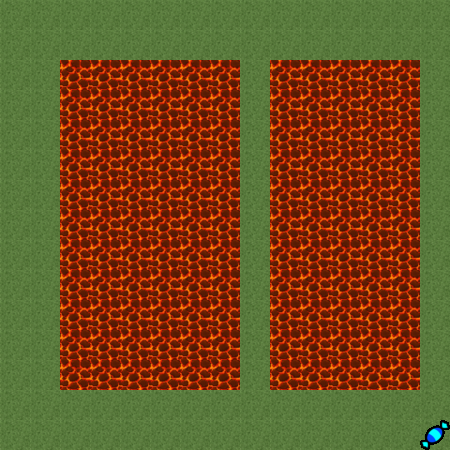

In [7]:
grid = visualize_map(large_rewards, large_terminal, cell_dim=30)
PIL.Image.fromarray(grid, 'RGB')

### 在马尔科夫决策过程上运行“动态规划值迭代”：
#### 须知道环境所有信息，每轮迭代，更新所有值，每个状态只考虑下一个状态，不考虑下下个状态，策略为只选择最大收益的行为。

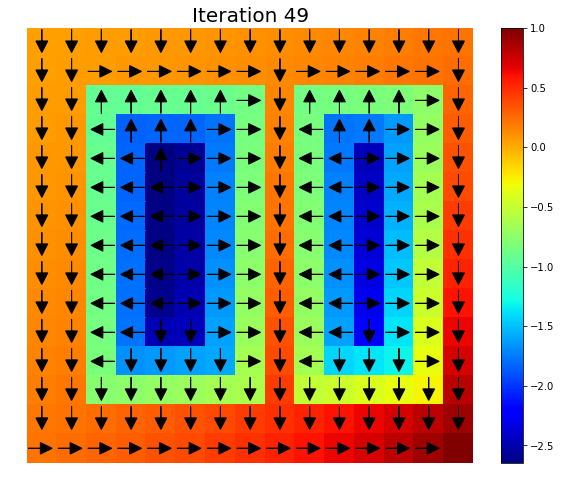

In [8]:
values, policy = vi.iterate(iterations=50, visualize=True) #iterations：迭代轮数   visualize：是否可视化

### 现在换个小地图，看看改变糖果奖励值、熔岩惩罚值和未来收益折现率的影响：

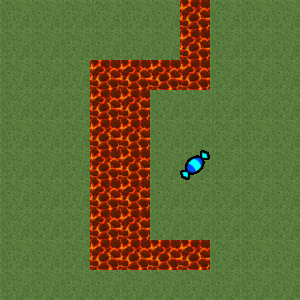

In [9]:
small_rewards, small_terminal = make_small_env(reward_value=1,lava_value=-1)
small_map = visualize_map(small_rewards, small_terminal, cell_dim=30)
PIL.Image.fromarray(small_map, 'RGB')

### 交互部分

In [10]:
interact(vi_wrapper, reward=widgets.IntSlider(min=1,max=8,step=1,value=5),\
         lava=widgets.FloatSlider(min=-5,max=0,step=0.25,value=-3),\
         gamma=widgets.FloatSlider(min=0.1,max=0.9,step=0.1,value=0.9));

interactive(children=(IntSlider(value=5, description='reward', max=8, min=1), FloatSlider(value=-3.0, descript…

## 现在实践QLearning走迷宫
***
### Q-learning算法流程如下

<p align="center">
  <img src="examples/Qlearning.png" align="center" width="800">
</p>

***
#### 游戏规则：

红矩形:          探险家

黑矩形:          怪物    奖励-1

黄圆:            宝藏    奖励+1

其它状态:         地面    奖励0


In [11]:
from QLearning_maze.maze_env import Maze
from QLearning_maze.RL_brain import QLearningTable

### 构建地图

In [12]:
env = Maze()

### 构建迭代循环体

In [13]:
def update():
    for episode in range(100):
        # initial observation
        observation = env.reset()

        while True:
            # fresh env
            env.render()

            # RL choose action based on observation
            action = RL.choose_action(str(observation))

            # RL take action and get next observation and reward
            observation_, reward, done = env.step(action)

            # RL learn from this transition
            RL.learn(str(observation), action, reward, str(observation_))

            # swap observation
            observation = observation_

            # break while loop when end of this episode
            if done:
                break

    # end of game
    print('game over')
    env.destroy()

### 初始化学习策略

In [14]:
RL = QLearningTable(actions=list(range(env.n_actions)), learning_rate=0.02, reward_decay=0.9, e_greedy=0.9)

### 确定轮数，调用循环体

In [15]:
env.after(100, update)

'after#0'

### 开始游戏

In [16]:
env.mainloop()

game over
